<a href="https://colab.research.google.com/github/ElhamIsm/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Elham Ismail

## Project Overview

## Load and Inspect Data

In [101]:
import pandas as pd
import numpy as np
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df= pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

In [103]:
#number of columns and rows
df.shape

(8523, 12)

In [104]:
#data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [105]:
#drop any duplicates if they exist
df.duplicated().sum()

0

In [106]:
#missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
weight_mean = df['Item_Weight'].mean()
weight_median = df['Item_Weight'].median()
weight_mean
weight_median
df['Item_Weight'] = df['Item_Weight'].fillna(weight_median)
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [114]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Missing')
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [115]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [116]:
#inconsistent categories
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [117]:
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [118]:
#fixing inconsistent values
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [120]:
#numerical cols data
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for column in num_cols:
    column_min = df[column].min()
    column_max = df[column].max()
    column_mean = df[column].mean()

    print(f"Column: {column}")
    print(f"Min: {column_min}")
    print(f"Max: {column_max}")
    print(f"Mean: {column_mean}")

Column: Item_Weight
Min: 4.555
Max: 21.35
Mean: 12.81341957057374
Column: Item_Visibility
Min: 0.0
Max: 0.328390948
Mean: 0.06613202877895108
Column: Item_MRP
Min: 31.29
Max: 266.8884
Mean: 140.9927819781767
Column: Outlet_Establishment_Year
Min: 1985
Max: 2009
Mean: 1997.8318667135984
Column: Item_Outlet_Sales
Min: 33.29
Max: 13086.9648
Mean: 2181.288913575032


## Exploratory Data Analysis

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

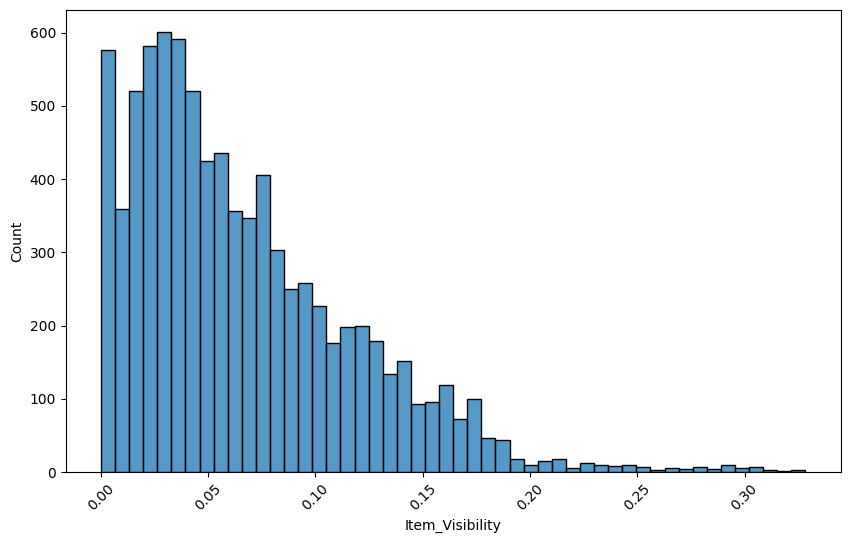

In [122]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="Item_Visibility")
ax.tick_params(axis='x', rotation = 45)

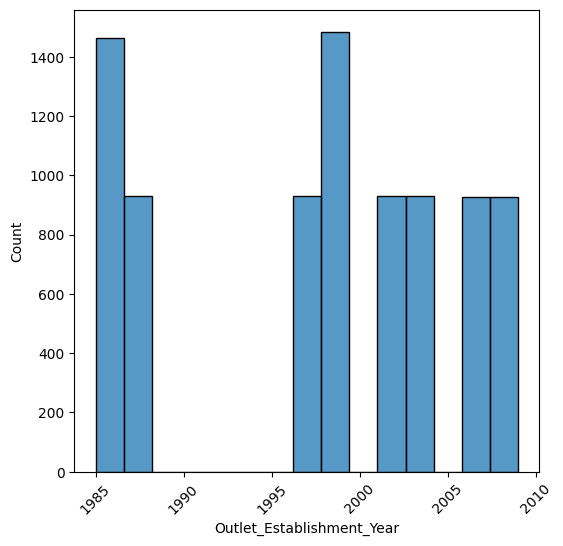

In [123]:
plt.figure(figsize=(6, 6))
ax = sns.histplot(data=df, x="Outlet_Establishment_Year")
ax.tick_params(axis='x', rotation = 45)

<Axes: xlabel='Item_Outlet_Sales'>

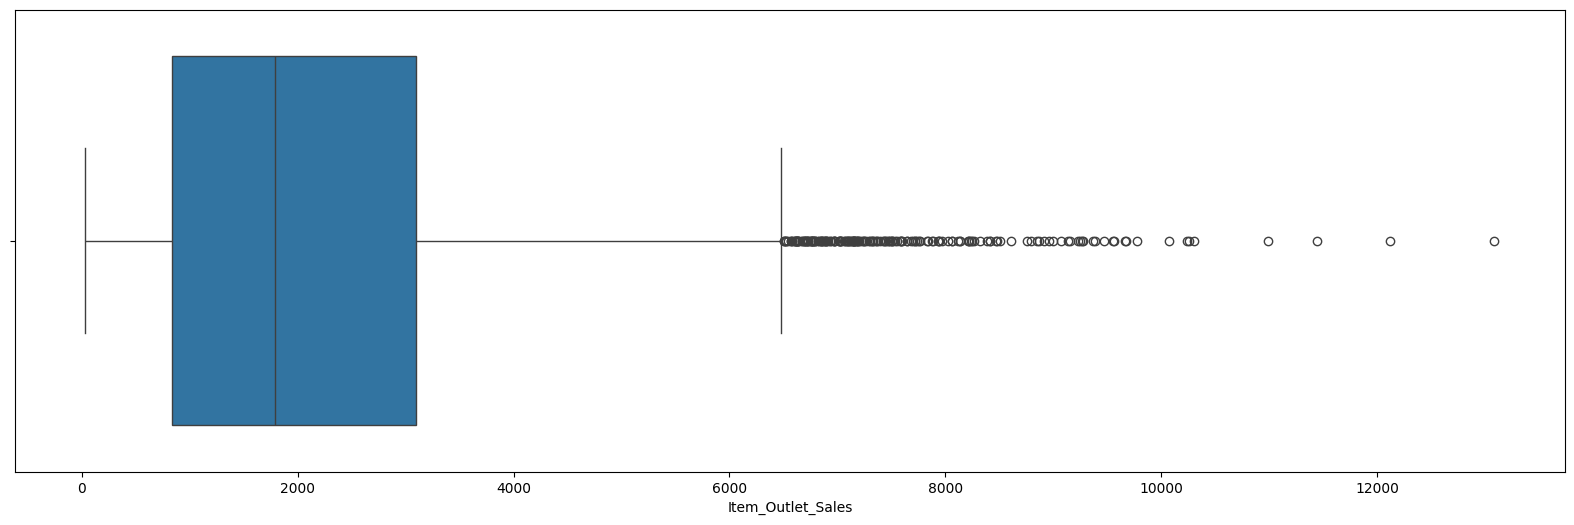

In [124]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x="Item_Outlet_Sales")

<Axes: xlabel='Item_MRP'>

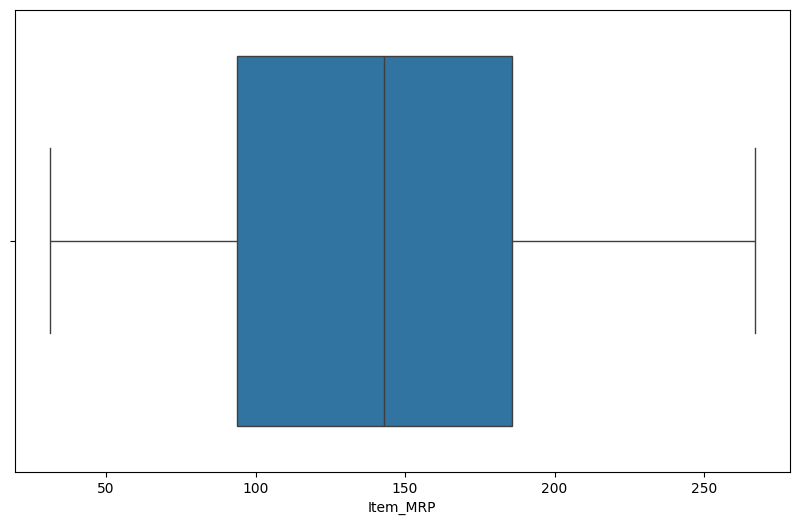

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Item_MRP")

<Axes: xlabel='Item_Weight'>

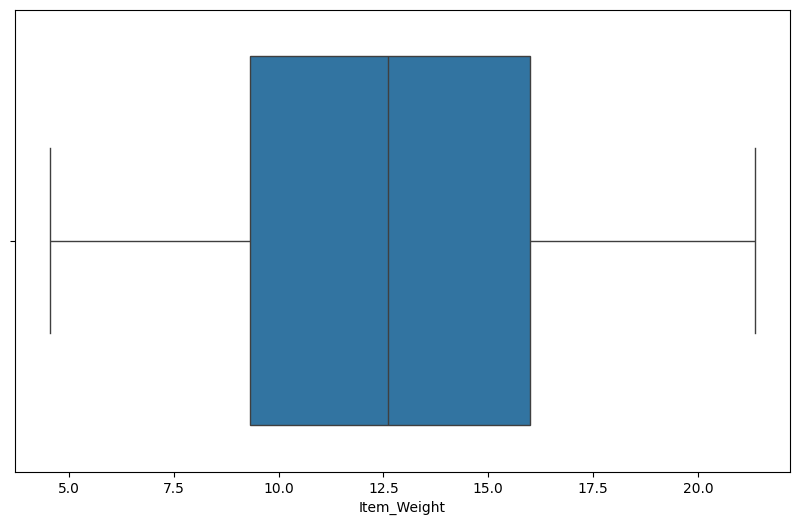

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Item_Weight")

In [126]:
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

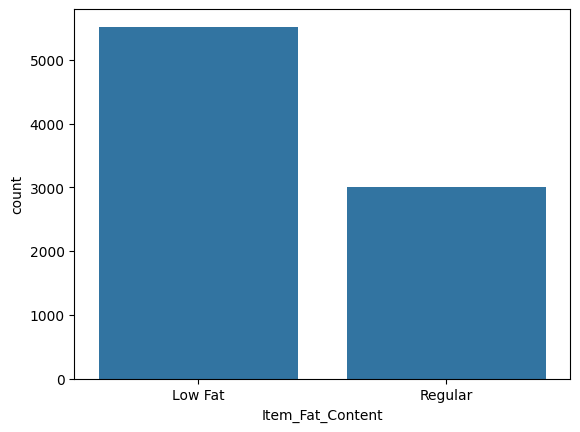

In [127]:
sns.countplot(data=df, x='Item_Fat_Content')

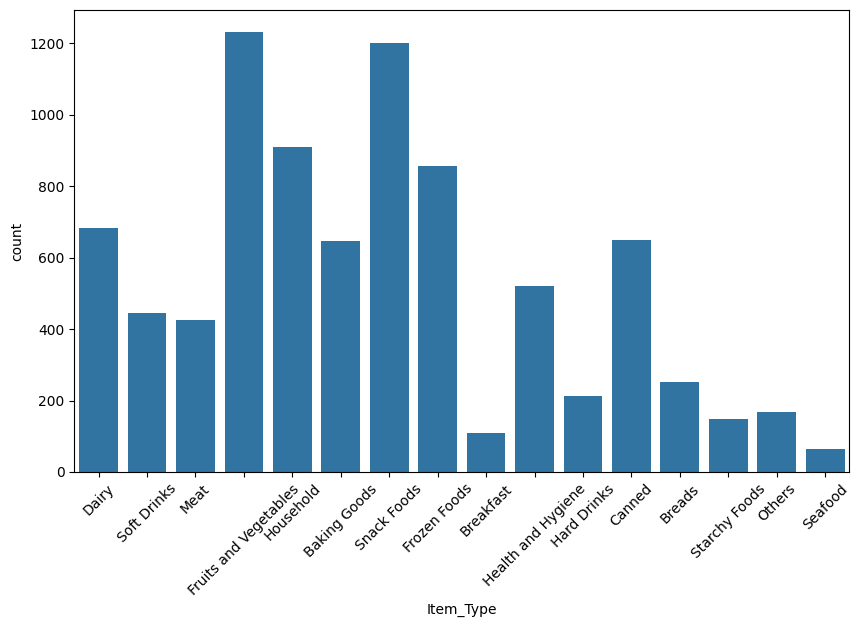

In [128]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Item_Type')
ax.tick_params(axis='x', rotation = 45)

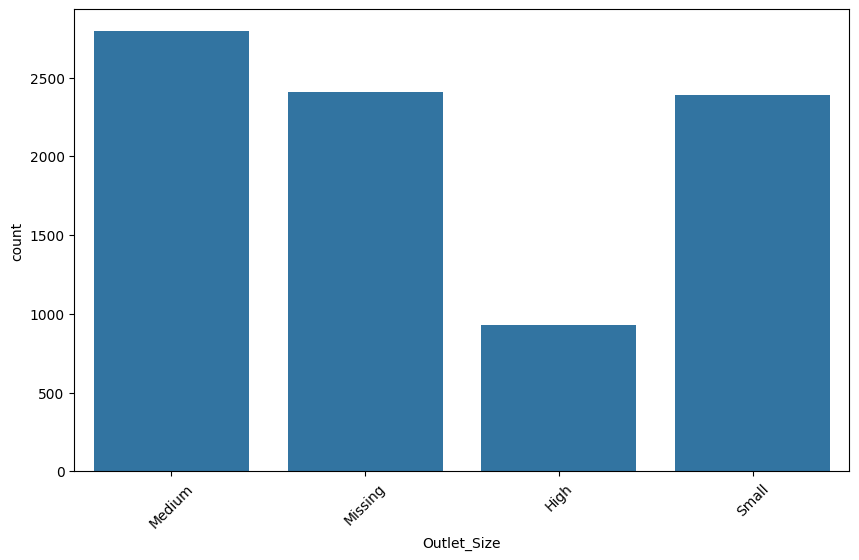

In [133]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Outlet_Size')
ax.tick_params(axis='x', rotation = 45)

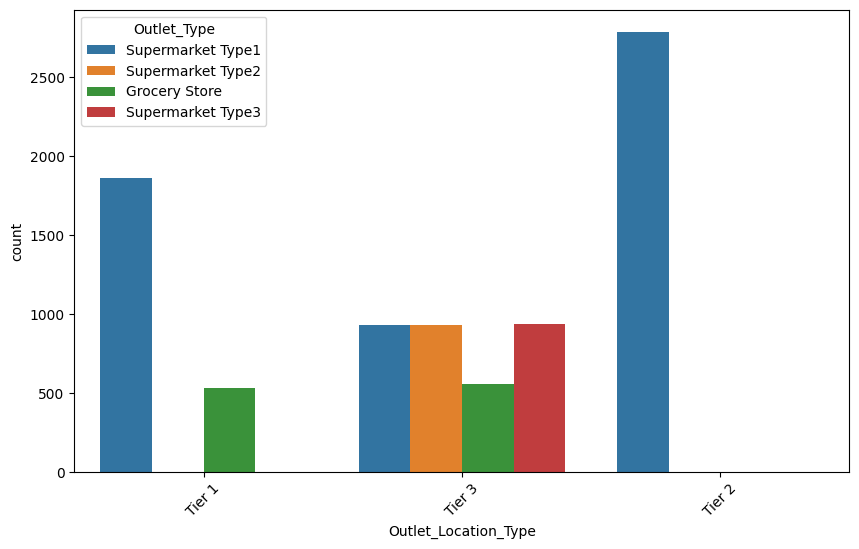

In [130]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Outlet_Location_Type', hue = 'Outlet_Type')
ax.tick_params(axis='x', rotation = 45)

<Axes: >

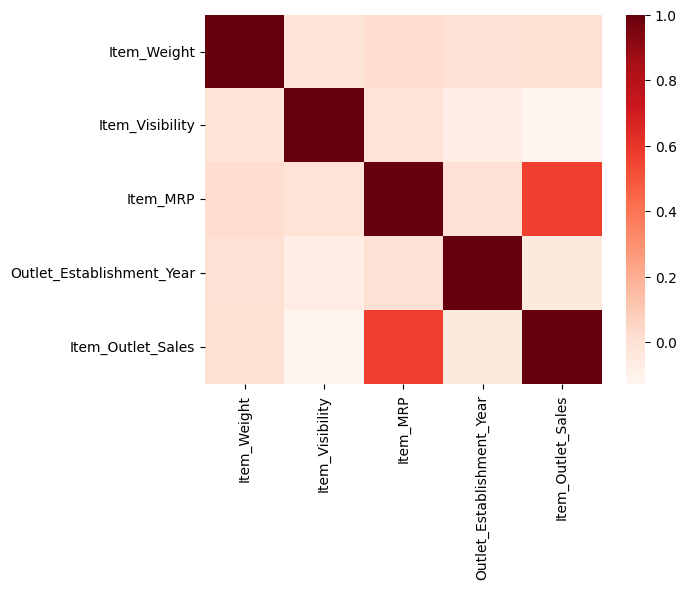

In [131]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Reds')

## Feature Inspection